<a href="https://colab.research.google.com/github/KoMurase/network/blob/master/%E9%A0%82%E7%82%B9%E9%96%93%E3%81%AE%E9%A1%9E%E4%BC%BC%E5%BA%A6%E8%A8%88%E7%AE%97.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import networkx as nx 
import matplotlib.pyplot as plt 

In [3]:
G = nx.karate_club_graph() 
plt.figure(figsize = (10, 10))

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

In [4]:
print(G)

Zachary's Karate Club


In [5]:
print(type(G))

<class 'networkx.classes.graph.Graph'>


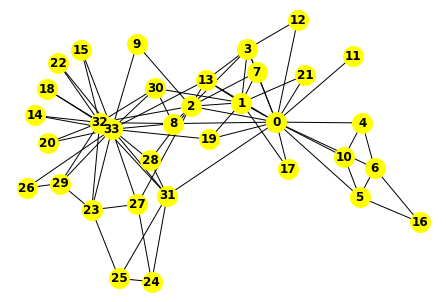

In [9]:
nx.draw_spring(G, node_size=400, node_color="yellow", with_labels=True, font_weight="bold")

In [10]:
#2頂点の指定
x = 4
y = 5 

In [12]:
print("{}のお隣さん : {}".format(x, list(G.neighbors(x))))
print("{}のお隣さん : {}".format(y, list(G.neighbors(y))))

4のお隣さん : [0, 6, 10]
5のお隣さん : [0, 6, 10, 16]


In [13]:
#辺の数
print(G.degree(x))
print(G.degree(y))

3
4


In [14]:
#common neighbors 
print("common neighbors : ", len(list(nx.common_neighbors(G, x, y))))

common neighbors :  3


In [15]:
#common neighbors 
print("common neighbors : ", list(nx.common_neighbors(G, x, y)))

common neighbors :  [0, 6, 10]


In [20]:
#Jaccard coefficient 
print("Jaccard coefficient : ", list(nx.jaccard_coefficient(G, [(x, y)]))[0][2])

Jaccard coefficient :  0.75


In [19]:
#Jaccard coefficient 
print("Jaccard coefficient : ", list(nx.jaccard_coefficient(G, [(x, y)])))

Jaccard coefficient :  [(4, 5, 0.75)]


In [21]:
#Adamic/Adar
print("Adamic/Adar : ", list(nx.adamic_adar_index(G, [(x, y)]))[0][2])

Adamic/Adar :  1.9922605072935597


In [22]:
#preferential attachment 
print("preferential attachment : ", list(nx.preferential_attachment(G, [(x, y)]))[0][2])

preferential attachment :  12


リンク予測を行う

In [23]:
#各2頂点に対して上記の類似度の値をリストにまとめる
#最後に類似度の降順にソートする (類似度はタプルの第三要素にある)
CN = []
JC = []
AA = []
PA = []

In [24]:
n = nx.number_of_nodes(G)

34

In [25]:
#それぞれの方法で2頂点間の類似度を計算して保存 

for x in range(x):
  for y in range(x+1, n):
    if not(G.has_edge(x, y)):

      CN.append(tuple([x,y, len(list(nx.common_neighbors(G, x, y)))]))
      JC.append(list(nx.jaccard_coefficient(G, [(x, y)]))[0])
      AA.append(list(nx.adamic_adar_index(G, [(x, y)]))[0])
      PA.append(list(nx.preferential_attachment(G, [(x, y)]))[0])


In [29]:
CN[0:2], JC[0:2], AA[0:2], PA[0:2]

([(0, 9, 1), (0, 14, 0)],
 [(0, 9, 0.058823529411764705), (0, 14, 0.0)],
 [(0, 9, 0.43429448190325176), (0, 14, 0)],
 [(0, 9, 32), (0, 14, 32)])

In [30]:
k = 10 #上位k件まで表示
print("common neighbors")
print(sorted(CN, key=lambda x:x[2], reverse=True)[:k])

print("Jaccard coefficient")
print(sorted(JC, key=lambda x:x[2], reverse=True)[:k])

print("Adamic/Adar")
print(sorted(AA, key=lambda x:x[2], reverse=True)[:k])

print("preferential attachment")
print(sorted(PA, key=lambda x:x[2], reverse=True)[:k])

common neighbors
[(2, 33, 6), (0, 33, 4), (0, 32, 3), (1, 8, 3), (1, 33, 3), (2, 30, 3), (2, 31, 3), (0, 16, 2), (0, 28, 2), (0, 30, 2)]
Jaccard coefficient
[(3, 17, 0.3333333333333333), (3, 21, 0.3333333333333333), (2, 33, 0.2857142857142857), (3, 19, 0.2857142857142857), (1, 8, 0.2727272727272727), (2, 30, 0.2727272727272727), (2, 31, 0.23076923076923078), (1, 12, 0.2222222222222222), (3, 8, 0.2222222222222222), (2, 12, 0.2)]
Adamic/Adar
[(2, 33, 4.719381261461351), (0, 33, 2.7110197222973085), (1, 33, 2.252921681630931), (2, 31, 1.6733425912309228), (0, 32, 1.613740043014111), (1, 8, 1.5163157625699744), (2, 30, 1.4788841522548752), (0, 16, 1.4426950408889634), (1, 32, 1.1556420023477334), (2, 23, 1.1237771248263264)]
preferential attachment
[(0, 33, 272), (0, 32, 192), (2, 33, 170), (1, 33, 153), (1, 32, 108), (3, 33, 102), (0, 23, 80), (3, 32, 72), (0, 27, 64), (0, 29, 64)]
